In [1]:
import matplotlib.pylab as pl
%matplotlib inline
import numpy as np0
import cPickle as pickle

In [2]:
data, labels = pickle.load(open('sanity-data', 'rb'))

In [3]:
import minpy.nn.model_builder as builder
import sys
sys.path.append('../../nn/')
from facility import *
from solver_primitives import *

In [4]:
def probability_surface(model, N=256, lower=-10, upper=10):
    X = np0.linspace(lower, upper, N)
    Y = np0.linspace(lower, upper, N)
    X, Y = np.meshgrid(X, Y)
    noise_X = np.vstack((flatten(X), flatten(Y))).T
    noise_Y = model.forward(noise_X, 'test')
    for i in range(4):
        noise_class = np.full((N * N,), i)
        noise_p = softmax_probability(noise_Y, noise_class)
        noise_p = noise_p.reshape(X.shape)
        pl.figure(figsize=(5, 5))
        c = pl.contour(to_np(X), to_np(Y), to_np(noise_p), 12)
        pl.clabel(c, fontsize=8)
        pl.title('probability surface (class %d)' % i)
        data_X, data_Y = data.T
        pl.plot(data_X, data_Y, 'bo')
        pl.gca().set_aspect('equal')

In [5]:
SHAPE = (64, 64, 64, 64, 4)
network = builder.Sequential()
for shape in SHAPE[:-1]:
    network.append(builder.Affine(shape))
    network.append(builder.ReLU())
network.append(builder.Affine(SHAPE[-1]))
model = builder.Model(network, 'softmax', (2,))
initialize(model)
updater = Updater(model, 'sgd', {'learning_rate' : 0.3})

/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):
/usr/local/lib/python2.7/dist-packages/matplotlib/text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):
/usr/local/lib/python2.7/dist-packages/matplotlib/text.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif rotation == 'vertical':


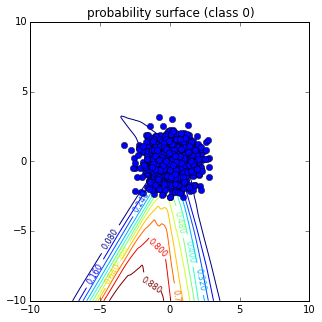

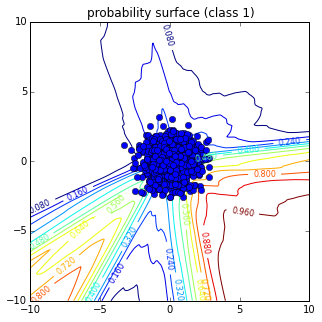

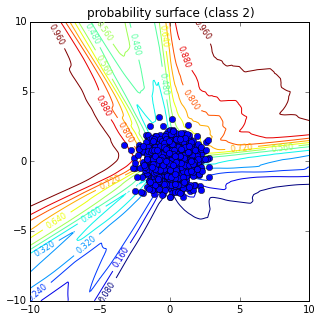

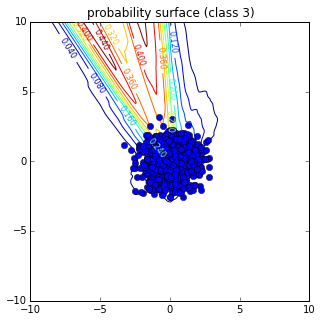

In [6]:
probability_surface(model)

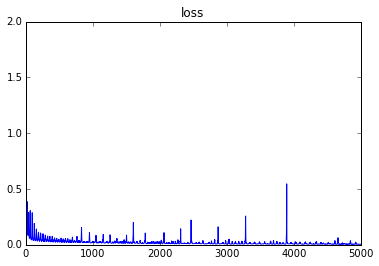

In [7]:
ITERATIONS = 5000
LOGGING_INTERVAL = 100
loss_history = []
for i in range(ITERATIONS):
    gradients, loss = gradient_loss(model, data, labels)
    updater.update(gradients)
    loss = to_float(loss)
    loss_history.append(loss)
#     if (i + 1) % LOGGING_INTERVAL == 0:
#         print loss
pl.plot(range(ITERATIONS), loss_history)
pl.title('loss')

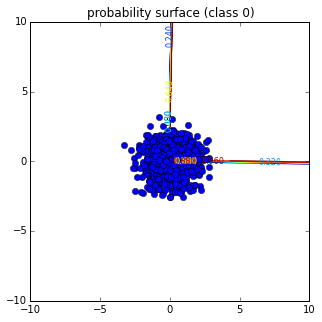

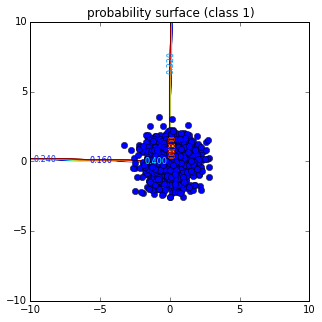

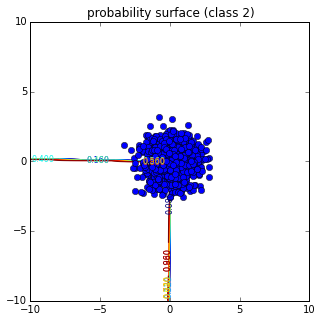

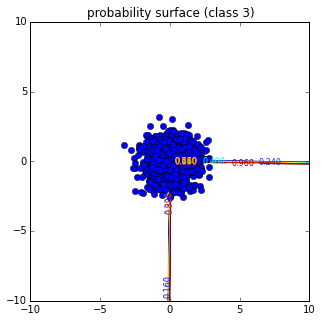

In [8]:
probability_surface(model)